___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from pyclustertend import hopkins
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

pd.options.display.max_rows=200
pd.options.display.max_columns=200

#### Load Dataset

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [9]:
df.rename(columns={"Annual Income (k$)":"Annual_income","Spending Score (1-100)":"Spending_score"},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_income   200 non-null    int64 
 4   Spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.isnull().sum().any()

False

In [13]:
df.describe()

,CustomerID,Age,Annual_income,Spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





<AxesSubplot:xlabel='Annual_income', ylabel='Spending_score'>

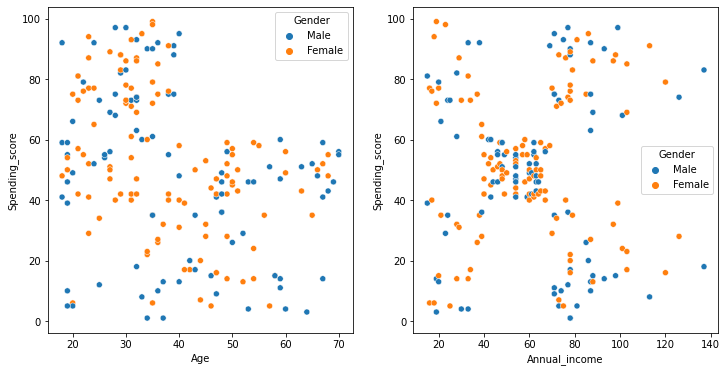

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(df.Age,df.Spending_score,hue=df.Gender)

plt.subplot(122)
sns.scatterplot(df.Annual_income,df.Spending_score,hue=df.Gender)

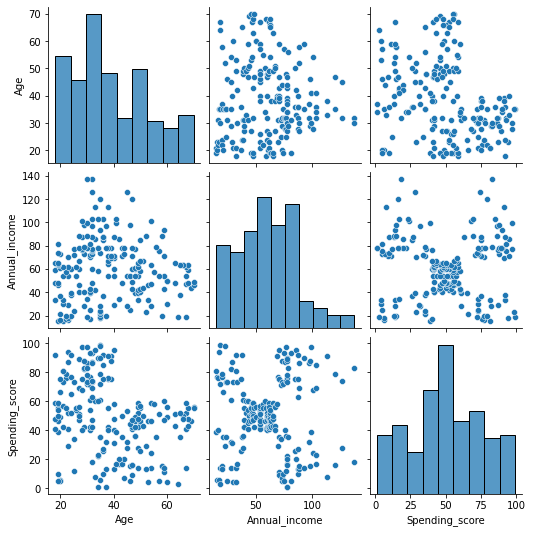

In [20]:
sns.pairplot(df.drop("CustomerID",axis=1))

<AxesSubplot:>

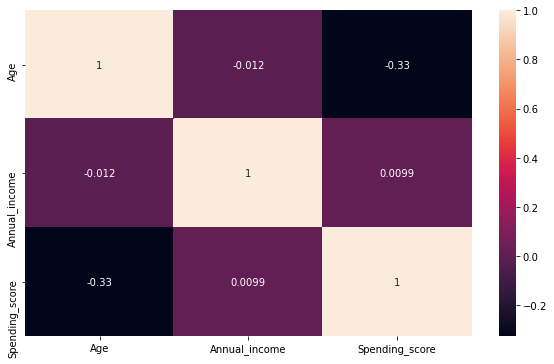

In [23]:
sns.heatmap(df.drop("CustomerID",axis=1).corr(),annot=True)

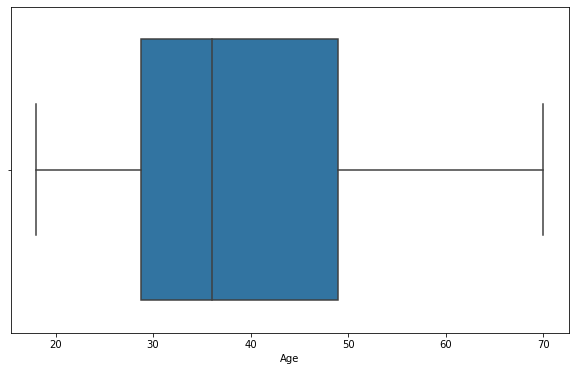

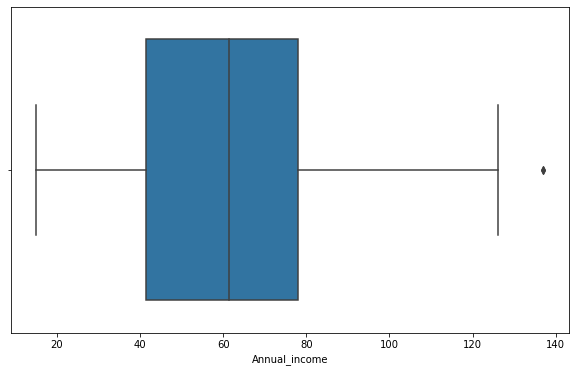

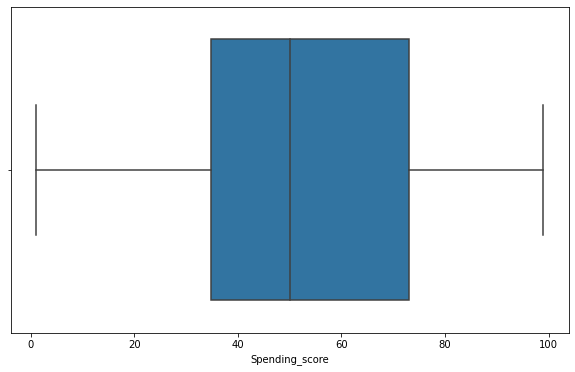

In [28]:
for i in df.drop("CustomerID",axis=1).select_dtypes("number"):
    plt.figure()
    sns.boxplot(i,data=df)
    plt.show()

---
---

In [36]:
df[df["Annual_income"]==137]

,CustomerID,Gender,Age,Annual_income,Spending_score
198,199,Male,32,137,18
199,200,Male,30,137,83


## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [66]:
X=df[["Age","Spending_score"]]

In [67]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [68]:
hopkins(X, X.shape[0])

0.3324137985038433

#### *ii. Determine optimal number of clusters*

In [69]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

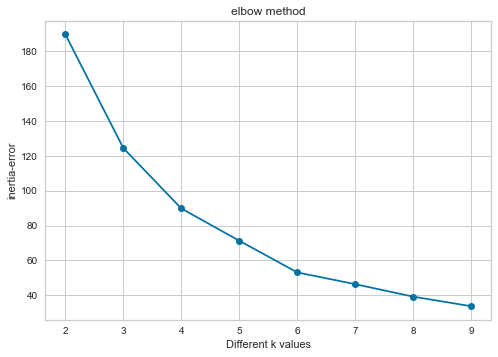

In [70]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

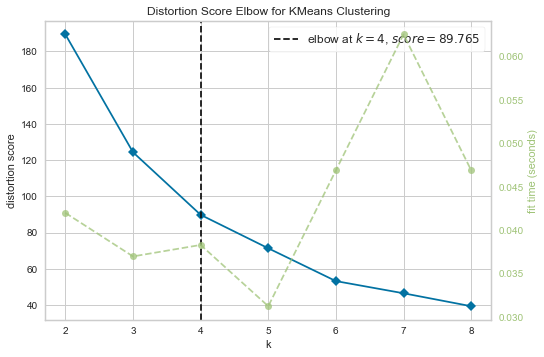

In [71]:


model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

#### *iii. Apply K Means*

In [94]:
model_x=KMeans(n_clusters=4,random_state=42)
model_x.fit(X)


KMeans(n_clusters=4, random_state=42)

In [95]:
model_x.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [74]:
silhouette_score(X, model_x.labels_)

0.4383860846564479

In [75]:
range_n_clusters = range(2,9)  ## düşük inertia yüsek silhoutte score istenen
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg},the inertia is : {kmeans.inertia_}")

For n_clusters=2, the silhouette score is 0.47212716430695223,the inertia is : 189.3874903399244
For n_clusters=3, the silhouette score is 0.4395299000230284,the inertia is : 124.32628617921526
For n_clusters=4, the silhouette score is 0.4383860846564479,the inertia is : 89.76521676586151
For n_clusters=5, the silhouette score is 0.4475485887887892,the inertia is : 71.2955659221944
For n_clusters=6, the silhouette score is 0.4531637132878646,the inertia is : 53.173737453809174
For n_clusters=7, the silhouette score is 0.4005396447043195,the inertia is : 46.4462850094916
For n_clusters=8, the silhouette score is 0.4138741299279621,the inertia is : 39.30587325192688


In [96]:
X=df[["Age","Spending_score"]]

In [97]:
X["Class"]=model_x.labels_
X

,Age,Spending_score,Class
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
5,22,76,2
6,35,6,1
7,23,94,2
8,64,3,1
9,30,72,2


#### *iv. Visualizing and Labeling All the Clusters*

<AxesSubplot:xlabel='Spending_score', ylabel='Class'>

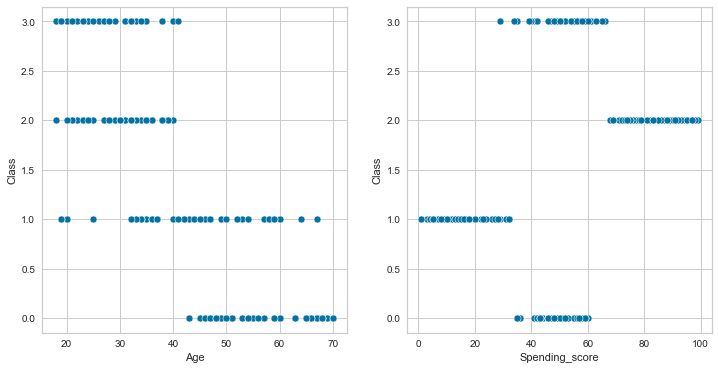

In [98]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(X.Age,X.Class)

plt.subplot(122)
sns.scatterplot(X.Spending_score,X.Class)

<AxesSubplot:xlabel='Age', ylabel='Spending_score'>

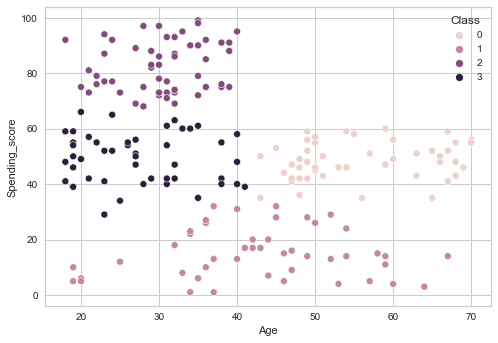

In [99]:
sns.scatterplot(X.Age,X.Spending_score,hue=X.Class,cmap="viridis")

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [101]:
Y=df[["Annual_income","Spending_score"]]


In [102]:
Y=scaler.fit_transform(Y)

In [103]:
hopkins(Y,Y.shape[0])

0.31958836402921104

#### *ii. Determine optimal number of clusters*

In [104]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(Y)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

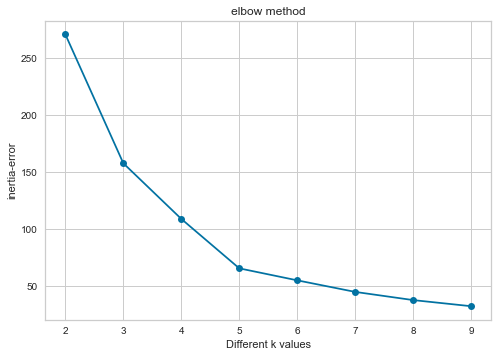

In [105]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

#### *iii. Apply K Means*

In [108]:
model_y=KMeans(n_clusters=5,random_state=42)
model_y.fit(Y)

KMeans(n_clusters=5, random_state=42)

In [107]:
range_n_clusters = range(2,9)  ## düşük inertia yüsek silhoutte score istenen
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(Y)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(Y, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg},the inertia is : {kmeans.inertia_}")

For n_clusters=2, the silhouette score is 0.3146990432802128,the inertia is : 270.70426664306717
For n_clusters=3, the silhouette score is 0.46658474419000145,the inertia is : 157.70400815035939
For n_clusters=4, the silhouette score is 0.4939069237513199,the inertia is : 108.92131661364358
For n_clusters=5, the silhouette score is 0.5546571631111091,the inertia is : 65.56840815571681
For n_clusters=6, the silhouette score is 0.5398800926790663,the inertia is : 55.057348270385965
For n_clusters=7, the silhouette score is 0.5263454490712252,the inertia is : 44.91118554999014
For n_clusters=8, the silhouette score is 0.45584381231187066,the inertia is : 37.73640346254161


In [109]:
Y=df[["Annual_income","Spending_score"]]

In [110]:
Y["Class"]=model_y.labels_

#### *iv. Visualizing and Labeling All the Clusters*

<AxesSubplot:xlabel='Annual_income', ylabel='Spending_score'>

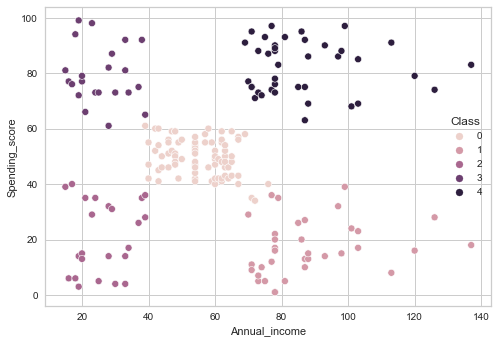

In [111]:
sns.scatterplot(Y.Annual_income,Y.Spending_score,hue=Y.Class,cmap="viridis")

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

#### ii. *Apply Agglomerative Clustering*

#### iii. *Visualizing and Labeling All the Clusters* 

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___